# Define custom catboost task

## Set up things

In [1]:
import pandas as pd

In [2]:
from Code.CatBoostClassifierCustomTask.custom import CustomTask

## Try out the task locally

In [3]:
from datarobot_drum.custom_task_interfaces import RegressionEstimatorInterface
print(dir(RegressionEstimatorInterface))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'default_artifact_filename', 'fit', 'load', 'load_task', 'log_message', 'predict', 'save', 'save_task']


In [4]:
# You can get information on the methods using `??`:
vanillaTask = RegressionEstimatorInterface
??vanillaTask

Init signature: vanillaTask()
Docstring:      <no docstring>
Source:        
class RegressionEstimatorInterface(EstimatorInterface):
    pass
File:           ~/.local/share/virtualenvs/MLOps-advanced-e-DItRu4/lib/python3.9/site-packages/datarobot_drum/custom_task_interfaces/estimator_interfaces.py
Type:           type
Subclasses:     CustomTask


In [5]:
# from datarobot_drum.custom_task_interfaces.custom_task_interface import CustomTaskInterface
# t = CustomTaskInterface()
# ??t

In [6]:
train = pd.read_csv('./Data/readmissions_train.csv')
X = train.drop(['readmitted'],axis=1)
y = train['readmitted']

In [7]:
task = CustomTask()
#??task

In [8]:
task = task.fit(X,y)

Learning rate set to 0.42021
0:	learn: 0.6553859	total: 63.2ms	remaining: 3.09s
1:	learn: 0.6307490	total: 71.7ms	remaining: 1.72s
2:	learn: 0.6204909	total: 79.8ms	remaining: 1.25s
3:	learn: 0.6156358	total: 88.3ms	remaining: 1.01s
4:	learn: 0.6115782	total: 95.9ms	remaining: 863ms
5:	learn: 0.6095943	total: 103ms	remaining: 757ms
6:	learn: 0.6072669	total: 110ms	remaining: 676ms
7:	learn: 0.6060200	total: 118ms	remaining: 620ms
8:	learn: 0.6050062	total: 126ms	remaining: 576ms
9:	learn: 0.6015476	total: 133ms	remaining: 534ms
10:	learn: 0.5984376	total: 141ms	remaining: 500ms
11:	learn: 0.5976143	total: 146ms	remaining: 463ms
12:	learn: 0.5963976	total: 151ms	remaining: 431ms
13:	learn: 0.5954034	total: 158ms	remaining: 407ms
14:	learn: 0.5936752	total: 165ms	remaining: 384ms
15:	learn: 0.5932026	total: 175ms	remaining: 372ms
16:	learn: 0.5909818	total: 182ms	remaining: 354ms
17:	learn: 0.5890332	total: 191ms	remaining: 339ms
18:	learn: 0.5861897	total: 199ms	remaining: 325ms
19:	lea

In [9]:
#task.save("temp")

In [10]:
#task = task.load("temp")

## Upload task

NOTE: We can also do this in the GUI at [https://app.datarobot.com/model-registry/custom-tasks](https://app.datarobot.com/model-registry/custom-tasks)

In [11]:
import datarobot as dr

In [12]:
client = dr.Client(config_path='/Volumes/GoogleDrive/My Drive/Configurations/drconfig_demo.yaml')

In [13]:
dr.ExecutionEnvironment.list(search_for='python')

[ExecutionEnvironment('[DataRobot] Python 3.9 ONNX Drop-In'),
 ExecutionEnvironment('[DataRobot] Python 3.9 PMML Drop-In'),
 ExecutionEnvironment('[DataRobot] Python 3.9 PyTorch Drop-In'),
 ExecutionEnvironment('[DataRobot] Python 3.9 Scikit-Learn Drop-In'),
 ExecutionEnvironment('[DataRobot] Python 3.9 XGBoost Drop-In'),
 ExecutionEnvironment('[DataRobot] Python 3.9 Keras Drop-In')]

In [14]:
execution_environment = dr.ExecutionEnvironment.get('5e8c889607389fe0f466c72d')
print("Description: "+execution_environment.description)
print("Version: "+execution_environment.latest_version.label)

Description: This template environment can be used to create artifact-only scikit-learn custom models. This environment contains scikit-learn and only requires your model artifact as a .pkl file and optionally a custom.py file.
Version: v40


Create a requirements file like you usually do.

Create model-metadata.yaml file:
- Follow the steps in [the docs](https://docs.datarobot.com/en/docs/modeling/special-workflows/cml/cml-ref/cml-validation.html)
- I used the example [here](https://github.com/datarobot/datarobot-user-models/tree/master/task_templates/2_estimators/4_python_binary_classification) to get started

Create the task:

In [31]:
create_custom_task = False
update_custom_task = True
build_custom_task = False

task_name = 'Catboost custom classifier'

In [32]:
from datarobot.enums import CUSTOM_TASK_TARGET_TYPE

# Create task
if create_custom_task:
    catboost_classification = dr.CustomTask.create(
        name=task_name,
        target_type=CUSTOM_TASK_TARGET_TYPE.BINARY
    )
    custom_task_id = catboost_classification.id
    print('Created new custom task with id {}'.format(custom_task_id))
else:
    custom_task_id = '6304d19472ae9680d564e19a'
    catboost_classification = dr.CustomTask.get(custom_task_id=custom_task_id)
    print('Using existing custom task with id {}'.format(custom_task_id))

    
# Create new version from folder
if update_custom_task:
    custom_task_folder = "Code/CatBoostClassifierCustomTask/"

    task_version = dr.CustomTaskVersion.create_clean(
        custom_task_id=catboost_classification.id,
        base_environment_id=execution_environment.id,
        folder_path=custom_task_folder,
    )

    task_version.refresh()
    custom_task_version_id = task_version.id
    print('Created new version with id {}'.format(custom_task_version_id))
else:
    custom_task_version_id = '6304eb2befb56877e90ab305'
    
    task_version = dr.CustomTaskVersion.get(
        custom_task_id=custom_task_id, custom_task_version_id=custom_task_version_id
    )
    print('Using existing version with id {}'.format(custom_task_version_id))

    
print('Working with custom task created at {}'.format(task_version.created_at))

Using existing custom task with id 6304d19472ae9680d564e19a
Created new version with id 6304eb2befb56877e90ab305
Working with custom task created at 2022-08-23T14:58:51.741410Z


In [33]:
catboost_classification.refresh()  # In order to see the change, you need to GET it from DataRobot
catboost_classification

CustomTask('Catboost custom classifier')

In [18]:
if build_custom_task:
    task_version.start_dependency_build_and_wait(3600)

## Get base blueprint to modify with new task

In [19]:
project_id = '62ff9ee1969b9a4bbeb104be'
model_id = '62ff9f422a6895b09c168200'
blueprint_id = '0697d7bf645861594f6c7d1cca262462'

save_blueprint = True
train_blueprint = False

In [20]:
from datarobot_bp_workshop import Workshop, Visualize
w = Workshop()

blueprint_graph = w.clone(blueprint_id=blueprint_id, project_id=project_id)
source_code = blueprint_graph.to_source_code(to_stdout=True)

w = Workshop(user_blueprint_id='6304dfaec33369a5530ab428', project_id='62ff9ee1969b9a4bbeb104be')

pnia4 = w.Tasks.PNIA4(w.TaskInputs.NUM)
pnia4.set_task_parameters(s=True)

diag_1_desc = w.Features.diag_1_desc

ordcat2 = w.Tasks.ORDCAT2(w.TaskInputs.CAT)
ordcat2.set_task_parameters(m='freq')

wngec2 = w.Tasks.WNGEC2(diag_1_desc, output_method=w.TaskOutputMethod.STACK)
wngec2.set_task_parameters(bi=True, a=0, lc=True, madf=0.8, midf=2, nrm='l2', num=[1, 2], tol=0, uidf=False)

eslgbmtc = w.Tasks.ESLGBMTC(wngec2, pnia4, ordcat2)
eslgbmtc.set_task_parameters(cbt=0.3, lr=0.05, n=2500, nl=[2, 4, 16], s=1, ss=1)

eslgbmtc_blueprint = w.BlueprintGraph(eslgbmtc, name='Light Gradient Boosted Trees Classifier with Early Stopping')


In [21]:
w.search_tasks(task_name)

Catboost custom classifier: [CUSTOMC_630389ffa4de122ca60ab4e9] 
  - (No description)


Catboost custom classifier: [CUSTOMC_6304b95461b612b4760ab27c] 
  - (No description)


Catboost custom classifier: [CUSTOMC_6304d19472ae9680d564e19a] 
  - (No description)

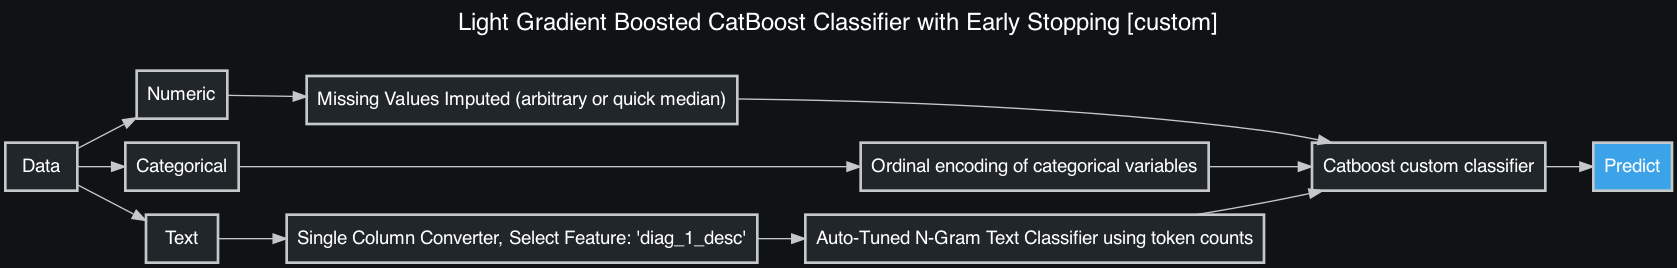

In [22]:
w = Workshop(project_id=project_id)

pnia4 = w.Tasks.PNIA4(w.TaskInputs.NUM)
pnia4.set_task_parameters(s=True)

diag_1_desc = w.Features.diag_1_desc

ordcat2 = w.Tasks.ORDCAT2(w.TaskInputs.CAT)
ordcat2.set_task_parameters(m='freq')

wngec2 = w.Tasks.WNGEC2(diag_1_desc, output_method=w.TaskOutputMethod.STACK)
wngec2.set_task_parameters(bi=True, a=0, lc=True, madf=0.8, midf=2, nrm='l2', num=[1, 2], tol=0, uidf=False)

# eslgbmtc = w.Tasks.ESLGBMTC(wngec2, pnia4, ordcat2)
#eslgbmtc.set_task_parameters(cbt=0.3, lr=0.05, n=2500, nl=[2, 4, 16], s=1, ss=1)
# catboost = w.CustomTasks.CUSTOMC_6304b95461b612b4760ab27c(wngec2, pnia4, ordcat2)
catboost = w.CustomTasks.CUSTOMC_6304d19472ae9680d564e19a(wngec2, pnia4, ordcat2)

# eslgbmtc_blueprint = w.BlueprintGraph(eslgbmtc, name='Light Gradient Boosted Trees Classifier with Early Stopping')
catboost_blueprint = w.BlueprintGraph(catboost, name='Light Gradient Boosted CatBoost Classifier with Early Stopping [custom]')

catboost_blueprint.show()

In [30]:
if save_custom_task:
    catboost_blueprint.save()

NameError: name 'save_custom_task' is not defined

In [23]:
if train_blueprint:
    catboost_blueprint.train(project_id=project_id)

Training requested! Blueprint Id: f7822c5f26f87cf0a9b3a54d15131e7d


In [28]:
print(dir(catboost_blueprint))

['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__friendly_repr__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_graph', '_built_input_ref', '_cached_graph', '_custom_task_definitions', '_custom_task_version_definitions', '_freeze', '_frozen', '_frozen_tasks', '_get_sink_task_ids', '_get_task_lookup', '_handle_feature_selection', '_input_name_lookup', '_is_dag', '_refresh_cached', '_sorted_task_ids', '_task_definitions', '_tasks_from_task', '_traverse_dag', '_unfreeze', '_update_with_user_blueprint', '_user_blueprint', '_workshop', 'add_to_repository', 'as_graphviz_string', 'creator', 'delete', 'deserialize', 'from_user_blueprint', 'from_user_blueprint_tasks', 'last_modifier_name', 'link_to_project', 'name', 'project_id'

In [29]:
catboost_blueprint.link_to_project

<bound method BlueprintGraph.link_to_project of Name: 'Light Gradient Boosted CatBoost Classifier with Early Stopping [custom]'

Input Data: Text | Numeric | Categorical
Tasks: Single Column Converter, Select Feature: 'diag_1_desc' | Missing Values Imputed (arbitrary or quick median) | Ordinal encoding of categorical variables | Auto-Tuned N-Gram Text Classifier using token counts | Catboost custom classifier
Linked Project Id: 62ff9ee1969b9a4bbeb104be>

In [24]:
X

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,diag_1_desc
0,Caucasian,Female,[50-60),?,Elective,Discharged to home,Physician Referral,1,CP,Surgery-Neuro,...,No,No,No,No,No,No,No,No,No,Spinal stenosis in cervical region
1,Caucasian,Female,[20-30),[50-75),Urgent,Discharged to home,Physician Referral,2,UN,?,...,No,No,No,No,No,No,No,No,No,"First-degree perineal laceration, unspecified ..."
2,Caucasian,Male,[80-90),?,Not Available,Discharged/transferred to home with home healt...,NaN,7,MC,Family/GeneralPractice,...,No,Steady,No,No,No,No,No,No,Yes,Pneumococcal pneumonia [Streptococcus pneumoni...
3,AfricanAmerican,Female,[50-60),?,Emergency,Discharged to home,Transfer from another health care facility,4,UN,?,...,No,Steady,No,No,No,No,No,No,Yes,Cellulitis and abscess of face
4,AfricanAmerican,Female,[50-60),?,Emergency,Discharged to home,Emergency Room,5,?,Psychiatry,...,No,Steady,No,No,No,No,No,Ch,Yes,"Bipolar I disorder, single manic episode, unsp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,Caucasian,Female,[70-80),?,Emergency,Discharged/transferred to home with home healt...,Emergency Room,9,MC,?,...,No,No,No,No,No,No,No,No,No,"Acute lymphoid leukemia, without mention of ha..."
9496,Caucasian,Male,[60-70),?,Urgent,Discharged to home,Emergency Room,2,?,?,...,No,Steady,No,No,No,No,No,No,Yes,Abscess of liver
9497,Caucasian,Male,[40-50),?,Emergency,Discharged to home,Emergency Room,1,?,?,...,No,No,No,No,No,No,No,No,Yes,"Respiratory abnormality, unspecified"
9498,Caucasian,Male,[50-60),?,Emergency,Discharged to home,Emergency Room,6,MD,?,...,No,Down,No,No,No,No,No,Ch,Yes,Malignant hypertensive heart disease without h...
